## Importing Libraries

In this section, we begin by importing the necessary Python libraries that will be used for time series analysis and visualization.

### Pandas
Pandas is a powerful library for data manipulation and analysis. It provides data structures like DataFrames and Series, which are essential for working with structured data.

### NumPy
NumPy is a fundamental library for numerical computations in Python. It offers support for large arrays and matrices of data, along with mathematical functions to operate on these arrays.

### Matplotlib
Matplotlib is a versatile library for creating static, animated, or interactive visualizations in Python. It is often used for plotting graphs, charts, and figures.

### Datetime
Datetime is a built-in Python module that is used for working with dates and times. It provides classes and functions to manipulate, format, and perform calculations with dates and times.

```python
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Loading Data

In this section, we load a dataset from a remote URL using the Pandas library. The dataset contains flight-related information that we will use for our time series analysis.

```python
# URL to the dataset
url = "https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab3/data/flight.csv"

# Read the dataset into a DataFrame
df = pd.read_csv(url)

# Display the first 3 rows of the DataFrame
df.head(3)


In [2]:
#url = "flight.csv"   
url = "https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab3/data/flight.csv"

df = pd.read_csv(url)
df.head(3)

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest
0,0,2013-1-1 05:40:00,2013-1-1 05:42:00,2013-1-1 09:23:00,2013-1-1 08:50:00,1141,JFK,MIA
1,1,2013-1-1 06:00:00,2013-1-1 05:54:00,2013-1-1 08:12:00,2013-1-1 08:37:00,461,LGA,ATL
2,2,2013-1-1 05:58:00,2013-1-1 05:54:00,2013-1-1 07:40:00,2013-1-1 07:28:00,1696,EWR,ORD


## Data Type Conversion

We perform data type conversion on specific columns of our DataFrame. We aim to convert these columns to the datetime data type while ignoring any errors and using the specified date-time format.



In [3]:
# Konverter kolonnen dep_time til datotype datetime, og ignorer feilmeldinger ('coerce')
df['dep_time'] = pd.to_datetime(df['dep_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Konverter kolonnen datetime_val til datotype datetime
df['datetime_val'] = pd.to_datetime(df['datetime_val'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Gjør det samme for arr_time og sched_arr_time
df['arr_time'] = pd.to_datetime(df['arr_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


## DataFrame Information

In this section, we use the `df.info()` method to display information about our DataFrame. The information provided includes the data types of each column, the number of non-null values, and memory usage.



In [4]:
df.info()     ##this is because I want to see that conversion went well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121427 entries, 0 to 121426
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      121427 non-null  int64         
 1   datetime_val    121427 non-null  datetime64[ns]
 2   dep_time        121421 non-null  datetime64[ns]
 3   arr_time        121379 non-null  datetime64[ns]
 4   sched_arr_time  121427 non-null  datetime64[ns]
 5   flight          121427 non-null  int64         
 6   origin          121427 non-null  object        
 7   dest            121427 non-null  object        
dtypes: datetime64[ns](4), int64(2), object(2)
memory usage: 7.4+ MB


## Handling Negative Air Time

In this section of the code, we iterate through each row of the DataFrame `df` to check if the 'air_time' is negative. The 'air_time' represents the time duration of a flight. If it's negative, it indicates that the flight arrived on the previous day.

```python
for index, row in df.iterrows():
    # Check if 'arr_time' is less than 'dep_time' (negative air time)
    if (row['arr_time'] < row['dep_time']):
        # Add one day to 'arr_time' to adjust for negative air time
        df.loc[index, 'arr_time'] = (row['arr_time']) + datetime.timedelta(days=1)
    
    # Check if 'sched_arr_time' is less than 'dep_time' (negative scheduled arrival time)
    if (row['sched_arr_time'] < row['dep_time']):
        # Add one day to 'sched_arr_time' to adjust for negative scheduled arrival time
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time']) + datetime.timedelta(days=1)


In [5]:
for index, row in df.iterrows():
    #if air_time is negative
    if (row['arr_time']<row['dep_time']):
        df.loc[index, 'arr_time'] = (row['arr_time'])+ datetime.timedelta(days=1)
    if (row['sched_arr_time']<row['dep_time']):
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time'])+ datetime.timedelta(days=1)

## Calculating Air Time and Delay

In this section of the code, we calculate two important time-related variables for flight data: 'air_time' and 'Delay.'

### Air Time Calculation
```python
# Calculate 'air_time' as the time duration between 'dep_time' and 'arr_time'
df['air_time'] = df['arr_time'] - df['dep_time']
```



### Delay Calculation
#### Calculate 'Delay' as the difference between 'arr_time' and 'sched_arr_time'
```python
df['Delay'] = df['arr_time'] - df['sched_arr_time']


In [6]:




# Beregn air_time som er tiden mellom dep_time og arr_time
df['air_time'] = df['arr_time'] - df['dep_time']


#Delay (forsinkelsen mellom arr_time og sched_arr_time):
df['Delay'] = df['arr_time'] - df['sched_arr_time']


df.head()



,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,Delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00


## Calculating Delay as a Percentage of Air Time

We calculate 'Delay_as_percent_of_air_time,' which represents the delay as a percentage of air time.

```python
# Calculate 'Delay_as_percent_of_air_time' as a percentage of the delay relative to air time
df['Delay_as_percent_of_air_time'] = (df['Delay'].dt.total_seconds() / df['air_time'].dt.total_seconds()) * 100


In [7]:
#Delay as a percent of air time (forsinkelse som prosent av air_time):
df['Delay_as_percent_of_air_time'] = (df['Delay'].dt.total_seconds() / df['air_time'].dt.total_seconds()) * 100
df.head() #get the first 5 rows

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,Delay,Delay_as_percent_of_air_time
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944


## Calculating Delay as a Percentage of Air Time

In this section of the code, we calculate 'percent_delay,' which represents the delay as a percentage of air time.

```python
# Calculate 'percent_delay' as a percentage of the delay relative to air time
df['percent_delay'] = (df['Delay'].dt.total_seconds() / df['air_time'].dt.total_seconds()) * 100


In [8]:
# Beregn forsinkelsen som en prosentandel av air_time
df['percent_delay'] = (df['Delay'].dt.total_seconds() / df['air_time'].dt.total_seconds()) * 100


In [9]:
df.head() #check the result 

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,Delay,Delay_as_percent_of_air_time,percent_delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942,-18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944,-4.968944


## Box Plot of 'percent_delay'

we create a box plot to visualize the distribution of the 'percent_delay' variable.

A box plot, also known as a box-and-whisker plot, is a statistical visualization that provides a graphical summary of the distribution of a dataset. It displays key statistics, such as the median, quartiles, and potential outliers, making it a valuable tool for understanding the spread and central tendency of the data.

In this specific case, we are generating a box plot for the 'percent_delay' variable, which represents the delay as a percentage of air time for a set of flights.

```python
df["percent_delay"].plot.box()
```

The box plot will show:

The median (middle line inside the box) of the 'percent_delay' values, giving us an idea of the typical delay percentage.
The interquartile range (IQR), which is the range between the first quartile (Q1, bottom of the box) and the third quartile (Q3, top of the box). It provides insight into the spread of the data.
Whiskers extending from the box, indicating the range within which most of the data falls.
Any potential outliers, which are data points that significantly deviate from the central distribution and are plotted individually as points outside the whiskers.


<Axes: >

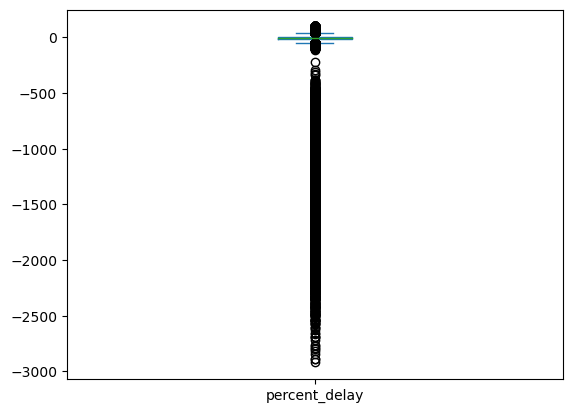

In [10]:
df["percent_delay"].plot.box()

## Identifying the Flight with the Lowest 'percent_delay'

In this section of the code, we are identifying the flight with the lowest 'percent_delay' value in the dataset and displaying its details. The 'percent_delay' represents the delay as a percentage of air time.

```python
minrow = df['percent_delay'].argmin()
min_delay_flight = df.iloc[minrow]
```
To achieve this, we first find the index (row number) of the flight with the lowest 'percent_delay' using the argmin() function. Once we have the index, we use iloc to retrieve the corresponding row from the DataFrame.


In [12]:
minrow= df['percent_delay'].argmin()
df.iloc[minrow]

Unnamed: 0                                    60788
datetime_val                    2013-04-01 20:40:00
dep_time                        2013-04-01 22:45:00
arr_time                        2013-04-01 23:31:00
sched_arr_time                  2013-04-02 21:54:00
flight                                         1178
origin                                          EWR
dest                                            BOS
air_time                            0 days 00:46:00
Delay                             -1 days +01:37:00
Delay_as_percent_of_air_time           -2919.565217
percent_delay                          -2919.565217
Name: 59583, dtype: object

## Summary Statistics of 'percent_delay'

The code `df["percent_delay"].describe()` generates summary statistics for the 'percent_delay' column in our DataFrame. These statistics provide valuable insights into the distribution of delay percentages for the flights in our dataset.

The summary statistics include the following key metrics:

- **count**: The total number of data points in the 'percent_delay' column. In this case, there are 121,373 data points.

- **mean**: The arithmetic mean (average) of 'percent_delay.' It represents the average delay percentage across all flights. In this dataset, the mean delay percentage is approximately -29.74%.

- **std**: The standard deviation of 'percent_delay.' It measures the dispersion or spread of the delay percentages. A higher standard deviation indicates greater variability in the data. Here, the standard deviation is approximately 206.59%.

- **min**: The minimum value of 'percent_delay.' It shows the smallest delay percentage observed in the dataset. The minimum delay percentage is approximately -2919.57%.

- **25%**: The 25th percentile, also known as the first quartile. It represents the value below which 25% of the data falls. In this case, 25% of the flights have a delay percentage less than or equal to -14.84%.

- **50%**: The 50th percentile, also known as the median. It's the middle value in the dataset when sorted in ascending order. Here, the median delay percentage is approximately -4.86%.

- **75%**: The 75th percentile, or the third quartile. It indicates the value below which 75% of the data falls. In this dataset, 75% of the flights have a delay percentage less than or equal to 6.17%.

- **max**: The maximum value of 'percent_delay.' It shows the largest delay percentage observed in the dataset. The maximum delay percentage is 100.00%.



In [14]:
df["percent_delay"].describe()

count    121373.000000
mean        -29.735566
std         206.591444
min       -2919.565217
25%         -14.838710
50%          -4.864865
75%           6.172840
max         100.000000
Name: percent_delay, dtype: float64

## Removing Outliers from 'percent_delay'

In this code block, we define a custom function called `remove_outlier` that aims to remove outliers from a given DataFrame column, specifically the 'percent_delay' column in our case.

The function takes the following steps:

1. Define `low` and `high` values: These values represent the lower and upper quantiles, respectively, used to identify potential outliers. In this case, `low` is set to 0.05, and `high` is set to 0.95. This means we want to keep the data within the 5th to 95th percentile range, effectively removing potential outliers in the lowest and highest 5% of the data.

2. Calculate quantiles: We calculate the quantiles (percentiles) of the 'percent_delay' column using the `quantile` method. Specifically, we calculate the quantiles corresponding to the `low` and `high` values.

3. Check if the column is numeric: We use the `is_numeric_dtype` function to check if the 'percent_delay' column is numeric. This step ensures that we only apply outlier removal to numeric data columns.

4. Remove outliers: If the column is numeric, we filter the data to keep only the values that are greater than or equal to the `low` quantile and less than or equal to the `high` quantile. This effectively removes data points that fall outside the specified quantile range.

5. Return the cleaned DataFrame: The function returns the DataFrame with potential outliers removed from the 'percent_delay' column.

Finally, we apply this `remove_outlier` function to the 'percent_delay' column of our DataFrame (`df["percent_delay"]`). It cleans the 'percent_delay' data by removing outliers and updates the column with the cleaned values.

This outlier removal process helps ensure that our analysis is not heavily influenced by extreme values and provides a more robust representation of the delay percentages in our dataset.


In [15]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = 0.05
    high = 0.95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df >= quant_df.loc[low]) & (df <= quant_df.loc[high])]
    return df

# Bruk funksjonen på percent_delay-kolonnen
df["percent_delay"] = remove_outlier(df["percent_delay"])


## Visualizing and Describing 'percent_delay' Data

In this code block, we perform two main tasks: plotting a box plot and generating descriptive statistics for the 'percent_delay' column in our DataFrame.

### Box Plot

We create a box plot for the 'percent_delay' column using the `plot.box()` method. A box plot visually represents the distribution of the data, showing the median, quartiles, and any potential outliers.

### Descriptive Statistics

We use the `describe()` method to generate summary statistics for the 'percent_delay' column. These statistics provide insights into the central tendency and spread of the data.

These statistics provide a comprehensive overview of the 'percent_delay' data, helping us understand its distribution and characteristics. For example, we can see the mean, spread (standard deviation), and identify any potential outliers through the box plot.

Overall, this code block allows us to visually assess the distribution of 'percent_delay' and obtain key statistical information about it.


count    109235.000000
mean         -3.763476
std          15.290651
min         -39.333333
25%         -13.636364
50%          -4.864865
75%           4.694836
max          42.424242
Name: percent_delay, dtype: float64


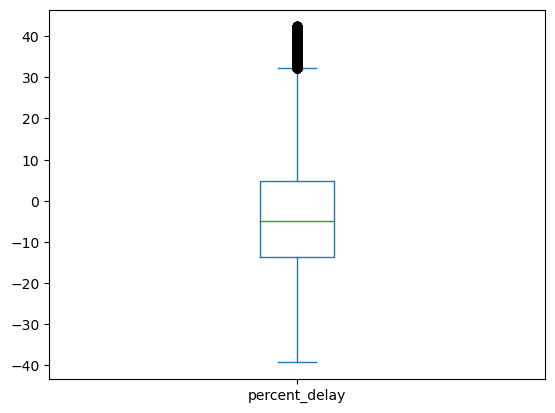

In [21]:
# Plot boksdiagram for percent_delay-kolonnen
df["percent_delay"].plot.box()

# Bruk describe for å se statistiske opplysninger
print(df["percent_delay"].describe())

<Axes: >

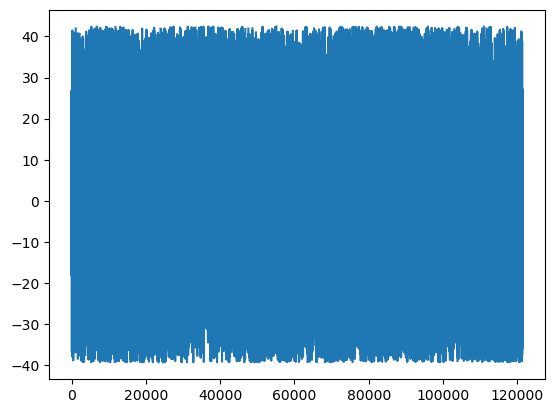

In [17]:
df["percent_delay"].plot.line()

In this code block, we are creating a scatter plot to visualize the relationship between 'Air Time' (in seconds) and 'Delay as a percent of Air Time' (expressed as a percentage). 



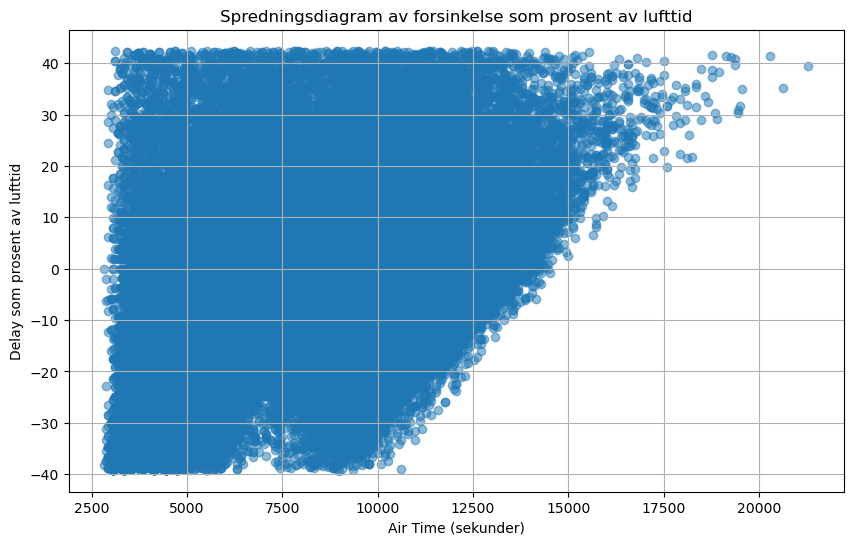

In [19]:
# Lag et spredningsdiagram av forsinkelse som prosentandel av lufttid
plt.figure(figsize=(10, 6))
plt.scatter(df['air_time'].dt.total_seconds(), df['percent_delay'], alpha=0.5)
plt.xlabel('Air Time (sekunder)')
plt.ylabel('Delay som prosent av lufttid')
plt.title('Spredningsdiagram av forsinkelse som prosent av lufttid')
plt.grid(True)
plt.show()

